### Packages

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

### Loading the News Category Data

In [61]:
pd.set_option('max_colwidth',None)
df = pd.read_json('C:/Users/natal/CSCI5922_NN/FinalProject/Semantical_Clustering_Data_Classification_Model/data/News_Category_Dataset_v3.json', lines=True)
df.sample(5)

,link,headline,category,short_description,authors,date
110232,https://www.huffingtonpost.com/entry/baked-chicken-recipes-that-arent-boring_n_6445264.html,Baked Chicken Recipes That Are Anything But Boring,TASTE,Promise.,Julie R. Thomson,2015-01-12
142755,https://www.huffingtonpost.com/entry/table-talk-polar-vortex_us_5b9dc710e4b03a1dcc8cc296,Table Talk: The Polar Vortex,PARENTING,Questions for discussion: Did it get cold this week where you live? Why do you think some scientists believe the extreme,,2014-01-10
123568,https://www.huffingtonpost.com/entry/3-simple-steps-towards-mindfulness_b_5671473.html,3 Simple Steps Towards Mindfulness,BUSINESS,"After 22 years in the workforce, I recently set out on a quest for a greater sense of purpose in my job. What I found had a profound impact on my life both at work and at home. Enter: Mindfulness.","General Mills, ContributorMaking lives healthier, easier and richer for 148 years",2014-08-12
73818,https://www.huffingtonpost.com/entry/blake-shelton-new-album-gwen-stefani_us_56d730ace4b03260bf78f0ee,Prepare For Blake Shelton's New Album To Be All About His Divorce And Gwen Stefani,ENTERTAINMENT,"Shocking, we know.",Cole Delbyck,2016-03-02
22092,https://www.huffingtonpost.com/entry/trump-halloween-costumes-for-kids-are-the-scariest-getups-of-all_us_59ef89c7e4b04917c593bbdc,Trump Halloween Costumes For Kids Are The Scariest Getups Of All,COMEDY,"Funny or Die's Athletic Trump includes ""supremely white golf attire"" and ""extra buttocks padding.""",Ron Dicker,2017-10-24


In [62]:
# checking if there are no null entries in the data
df.isnull().sum().any()

False

### Formatting the dataset / Cleaning / Curating

In [63]:
# replacing the name POLITICS into POLITICS_GENERAL to create superclasses
df['category'] = df['category'].replace(['POLITICS'], 'GENERAL POLITICS')
df['category'] = df['category'].replace(['ENTERTAINMENT'], 'LEISURE')

In [64]:
# checking how many examples have no short_descriptions
len_orig = len(df)
print("Length of original data set", len_orig)

len_no_desc = len(df[df['short_description'].isin([''])])
print("Number of examples with no short description: ", len_no_desc)

len_no_head = len(df[df['headline'].isin([''])])
print("Number of examples with no headline: ", len_no_head)

Length of original data set 209527
Number of examples with no short description:  19712
Number of examples with no headline:  6


In [65]:
# getting rid of no headline examples
df_no_head = df[~df['headline'].isin([''])]

# getting rid of no desc examples
df_no_desc = df[~df['short_description'].isin([''])]

c:\Users\natal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'News Categories in Original Data: 42 distinct categories')

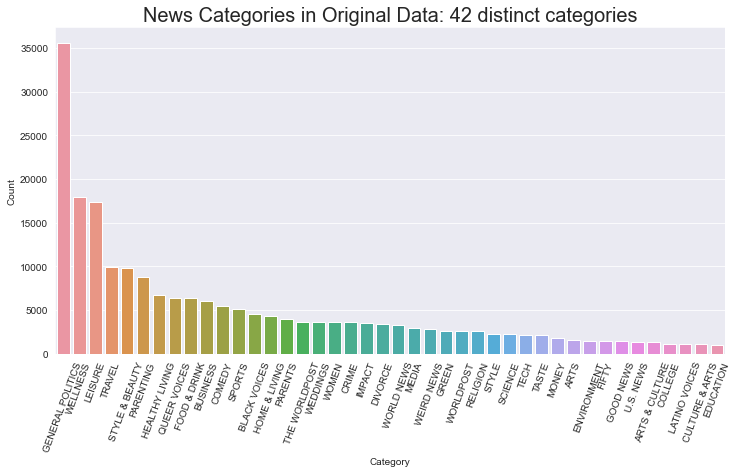

In [66]:
# plotting the original data categories
category_label = df.category.value_counts()
plt.figure(figsize=(12, 6))
sns.set_style('darkgrid')
sns.barplot(category_label.index, category_label)
plt.xlabel('Category', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.xticks(rotation=70)
plt.title(f'News Categories in Original Data: {len(df.category.unique())} distinct categories', fontsize=20)

c:\Users\natal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'News Categories in Data Without None Short Description: 42 distinct categories')

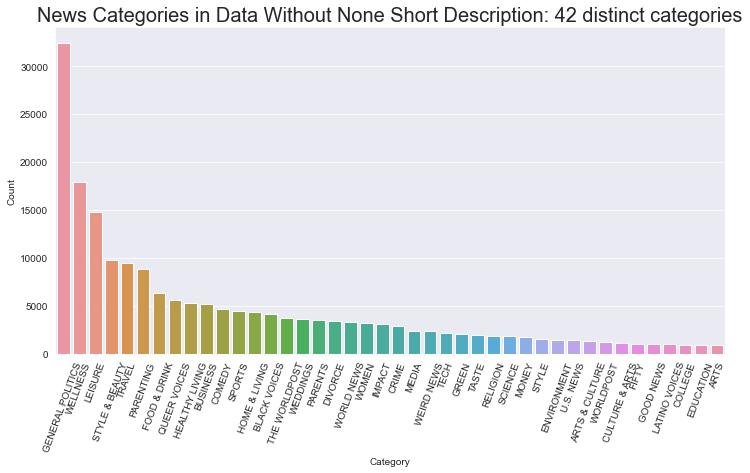

In [67]:
# plotting the data with none short_desc categories
category_label = df_no_desc.category.value_counts()
plt.figure(figsize=(12, 6))
sns.set_style('darkgrid')
sns.barplot(category_label.index, category_label)
plt.xlabel('Category', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.xticks(rotation=70)
plt.title(f'News Categories in Data Without None Short Description: {len(df_no_desc.category.unique())} distinct categories', fontsize=20)

c:\Users\natal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'News Categories in Data Without None Headline: 42 distinct categories')

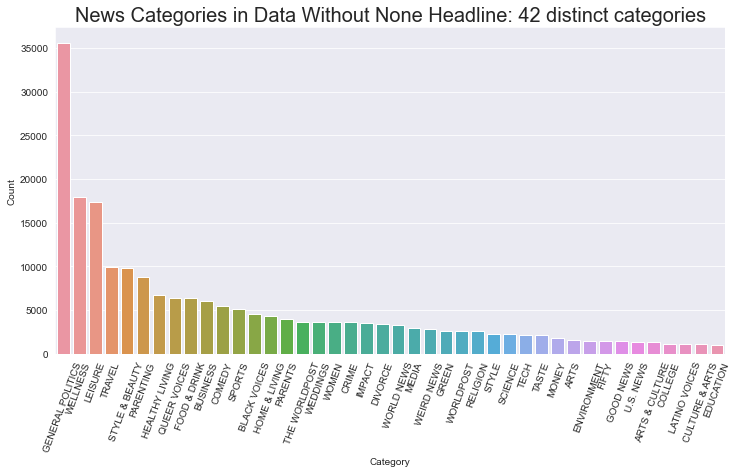

In [68]:
# plotting the data with none headlines categories
category_label = df_no_head.category.value_counts()
plt.figure(figsize=(12, 6))
sns.set_style('darkgrid')
sns.barplot(category_label.index, category_label)
plt.xlabel('Category', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.xticks(rotation=70)
plt.title(f'News Categories in Data Without None Headline: {len(df_no_head.category.unique())} distinct categories', fontsize=20)

In [69]:
# the final df will be cleaned from the exmaples with none headlines; predictions will be calculated based on the headline content
df = df[~df['headline'].isin([''])]

In [70]:
len(df_no_head) == len(df)

True

### Making a df with 4 columns: headline, superclass, class, short-description

In [71]:
# division of classes under superclasses: 9

POLITICS_SUPERCLASS = ['GENERAL POLITICS', 'THE WORLDPOST', 'WORLD NEWS', 'WORLDPOST', 'FIFTY', 'GOOD NEWS', 'U.S. NEWS']
HEALTH_SUPERCLASS = ['WELLNESS', 'HEALTHY LIVING','GREEN','ENVIRONMENT']
LIFESTYLE_SUPERCLASS = ['STYLE & BEAUTY','FOOD & DRINK','HOME & LIVING','STYLE','TASTE']
ENTERTAINMENT_SUPERCLASS = ['LEISURE', 'TRAVEL', 'COMEDY', 'SPORTS','WEIRD NEWS']
FAMILY_SUPERCLASS = ['PARENTING', 'PARENTS', 'WEDDINGS', 'DIVORCE']
CULTURE_SUPERCLASS = ['MEDIA','ARTS','ARTS & CULTURE', 'CULTURE & ARTS']
COMMUNITIES_SUPERCLASS = ['QUEER VOICES', 'BLACK VOICES', 'WOMEN', 'LATINO VOICES']
SOCIAL_SUPERCLASS = ['CRIME', 'IMPACT','RELIGION','COLLEGE', 'EDUCATION']
SCIENCE_TECH_SUPERCLASS = ['BUSINESS','SCIENCE','TECH','MONEY']

In [72]:
# renaming the category name to class name
df.rename(columns = {'category': 'class'}, inplace=True)

In [73]:
# adding a superclass column based on the value in class column
def label_superclass(row):
    if row['class'] in POLITICS_SUPERCLASS:
        return 'POLITICS'
    if row['class'] in HEALTH_SUPERCLASS:
        return 'HEALTH'
    if row['class'] in LIFESTYLE_SUPERCLASS:
        return 'LIFESTYLE'
    if row['class'] in ENTERTAINMENT_SUPERCLASS:
        return 'ENTERTAINMENT'
    if row['class'] in FAMILY_SUPERCLASS:
        return 'FAMILY'
    if row['class'] in CULTURE_SUPERCLASS:
        return 'CULTURE'
    if row['class'] in COMMUNITIES_SUPERCLASS:
        return 'COMMUNITIES'
    if row['class'] in SOCIAL_SUPERCLASS:
        return 'SOCIAL'
    if row['class'] in SCIENCE_TECH_SUPERCLASS:
        return 'SCIENCE_TECH'
    

In [74]:
df['superclass'] = df.apply(lambda row: label_superclass(row), axis=1)

In [75]:
df.columns

Index(['link', 'headline', 'class', 'short_description', 'authors', 'date',
       'superclass'],
      dtype='object')

In [76]:
# extracting only 4 columns of interest

df_small = df[['headline', 'class', 'superclass','short_description']]
df_small

,headline,class,superclass,short_description
0,Over 4 Million Americans Roll Up Sleeves For Omicron-Targeted COVID Boosters,U.S. NEWS,POLITICS,Health experts said it is too early to predict whether demand would match up with the 171 million doses of the new boosters the U.S. ordered for the fall.
1,"American Airlines Flyer Charged, Banned For Life After Punching Flight Attendant On Video",U.S. NEWS,POLITICS,"He was subdued by passengers and crew when he fled to the back of the aircraft after the confrontation, according to the U.S. attorney's office in Los Angeles."
2,23 Of The Funniest Tweets About Cats And Dogs This Week (Sept. 17-23),COMEDY,ENTERTAINMENT,"""Until you have a dog you don't understand what could be eaten."""
3,The Funniest Tweets From Parents This Week (Sept. 17-23),PARENTING,FAMILY,"""Accidentally put grown-up toothpaste on my toddler’s toothbrush and he screamed like I was cleaning his teeth with a Carolina Reaper dipped in Tabasco sauce."""
4,Woman Who Called Cops On Black Bird-Watcher Loses Lawsuit Against Ex-Employer,U.S. NEWS,POLITICS,Amy Cooper accused investment firm Franklin Templeton of unfairly firing her and branding her a racist after video of the Central Park encounter went viral.
...,...,...,...,...
209522,RIM CEO Thorsten Heins' 'Significant' Plans For BlackBerry,TECH,SCIENCE_TECH,Verizon Wireless and AT&T are already promoting LTE devices including smartphones and tablets from RIM's rivals. RIM's first
209523,Maria Sharapova Stunned By Victoria Azarenka In Australian Open Final,SPORTS,ENTERTAINMENT,"Afterward, Azarenka, more effusive with the press than normal, credited her coach of two years, Sam Sumyk, for his patient"
209524,"Giants Over Patriots, Jets Over Colts Among Most Improbable Super Bowl Upsets Of All Time (VIDEOS)",SPORTS,ENTERTAINMENT,"Leading up to Super Bowl XLVI, the most talked about game could end up being one that occurred a few years ago. After all"
209525,Aldon Smith Arrested: 49ers Linebacker Busted For DUI,SPORTS,ENTERTAINMENT,CORRECTION: An earlier version of this story incorrectly stated the location of KTVU and the 2011 league leader in sacks


c:\Users\natal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'News Superclasses: 9 distinct superclasses')

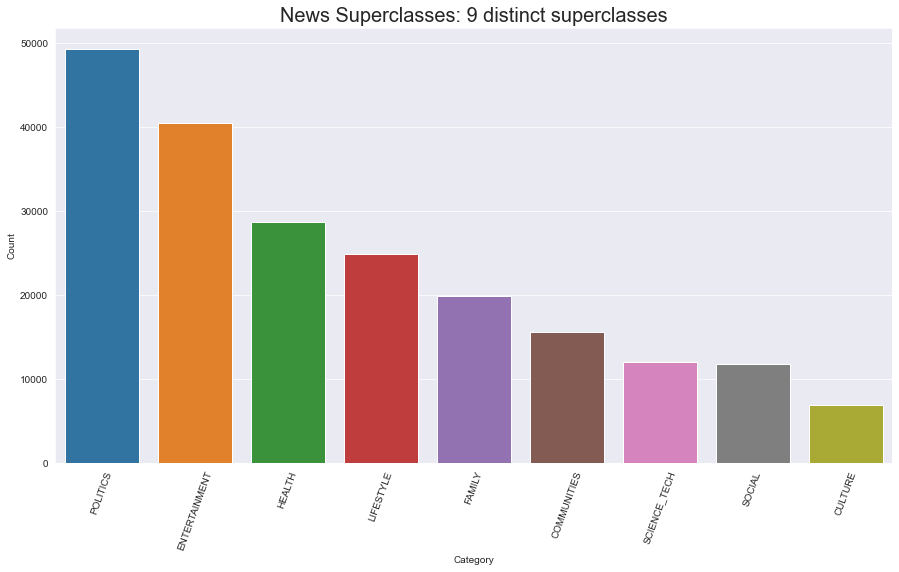

In [77]:
# plotting the data categories
superclass_label = df_small.superclass.value_counts()
plt.figure(figsize=(15, 8))
sns.set_style('darkgrid')
sns.barplot(superclass_label.index, superclass_label)
plt.xlabel('Category', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.xticks(rotation=70)
plt.title(f'News Superclasses: {len(df_small.superclass.unique())} distinct superclasses', fontsize=20)

## Data Cleaning

In [78]:
import importlib, import_ipynb
import re
import nltk
nltk.download('stopwords')
from nltk.stem.wordnet import WordNetLemmatizer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\natal/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [79]:
# clean the text data using regex and data cleaning function
def datacleaning(text):
    whitespace = re.compile(r"\s+")
    user = re.compile(r"(?i)@[a-z0-9_]+")
    text = whitespace.sub(' ', text)
    text = user.sub('', text)
    text = re.sub(r"\[[^()]*\]","", text)
    text = re.sub("\d+", "", text)
    text = re.sub(r'[^\w\s]','',text)
    text = re.sub(r"(?:@\S*|#\S*|http(?=.*://)\S*)", "", text)
    text = text.lower()
    
    # defining list of stopwords
    stopwords = nltk.corpus.stopwords.words('english')
    # removing stop-words
    text = [word for word in text.split() if word not in list(stopwords)]
    
    # word lemmatization
    sentence = []
    for word in text:
        lemmatizer = WordNetLemmatizer()
        sentence.append(lemmatizer.lemmatize(word,'v'))
        
    return ' '.join(sentence)  

In [80]:
df_small['cleaned_headline'] = df_small['headline'].apply(datacleaning)

C:\Users\natal\AppData\Local\Temp\ipykernel_3992\3857714091.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_small['cleaned_headline'] = df_small['headline'].apply(datacleaning)


In [81]:
df_small['cleaned_short_description'] = df_small['short_description'].apply(datacleaning)

C:\Users\natal\AppData\Local\Temp\ipykernel_3992\1185773635.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_small['cleaned_short_description'] = df_small['short_description'].apply(datacleaning)


In [82]:
df_small.sample(5)

,headline,class,superclass,short_description,cleaned_headline,cleaned_short_description
137523,Redefine How You Spend Time,WELLNESS,HEALTH,"When opportunity comes along, ask yourself if it will allow you to spend more or less time inside your living circle. Don't go outside your living circle any more than you have to. Every minute spent outside your living circle is a minute of your life that you've lost forever.",redefine spend time,opportunity come along ask allow spend less time inside live circle dont go outside live circle every minute spend outside live circle minute life youve lose forever
124289,"Kids React To Typewriters, We Feel Old Again",COMEDY,ENTERTAINMENT,,kid react typewriters feel old,
69967,"Hillary Clinton, Bernie Sanders Made Some False Claims In The Democratic Debate",GENERAL POLITICS,POLITICS,"They sparred over the minimum wage, campaign contributions, guns and more.",hillary clinton bernie sanders make false claim democratic debate,spar minimum wage campaign contributions gun
200842,Bridging the Gap: Unbind Your Heart a Little More,WELLNESS,HEALTH,"At every moment we have the power invested in us to touch another human, heart-to-heart, and affect their lives by conveying the truth of all truths: We are One. We have the power to bridge the illusion and pain of separation.",bridge gap unbind heart little,every moment power invest us touch another human hearttoheart affect live convey truth truths one power bridge illusion pain separation
35375,Sean Hannity Wants Trump To Cancel Press Briefings And Just Tweet His 'Accomplishments',MEDIA,CULTURE,"“Why waste the energy trying to appease people who obviously hate his guts and want to destroy him?""",sean hannity want trump cancel press brief tweet accomplishments,waste energy try appease people obviously hate gut want destroy


## Data Splitting for Headline Data

Since only the training data is clustered to examine the impact on the model training, data splitting is being performed now.

In [83]:
from sklearn.model_selection import train_test_split, cross_val_score

In [115]:
new_df,  test_df = train_test_split(df_small, test_size=0.20)

In [116]:
%store test_df

Stored 'test_df' (DataFrame)


In [85]:
print("Size of training data for headlines: ", len(new_df))
print("Size of testing data for headlines: ", len(test_df))

Size of training data for headlines:  167616
Size of testing data for headlines:  41905


In [86]:
df_small_short = df_small[~df_small['short_description'].isin([''])]

In [87]:
new_df_short,  test_df_short = train_test_split(df_small_short, test_size=0.20)

In [88]:
print("Size of training data for headlines: ", len(new_df_short))
print("Size of testing data for headlines: ", len(test_df_short))

Size of training data for headlines:  151851
Size of testing data for headlines:  37963


## Aplhabetic Clustering
### Ordering by superclass alphabetically

In [109]:
ordered_super_alpha_text = new_df.sort_values('superclass',ignore_index=True)
#ordered_super_alpha_text
%store ordered_super_alpha_text

Stored 'ordered_super_alpha_text' (DataFrame)


### Ordering by class alphabetically

In [110]:
ordered_class_alpha_text = new_df.sort_values('class',ignore_index=True)
%store ordered_class_alpha_text

Stored 'ordered_class_alpha_text' (DataFrame)


## Semantic Clustering
### Ordering by class hierarchically descending

Clusters within one superclass.

Descending number of texts. First class in each superclass has the most number of texts in this class. Last one - the least.

All classes from one superclass will be put together.

In [91]:
sem_clusters_order_desc = POLITICS_SUPERCLASS + ENTERTAINMENT_SUPERCLASS + HEALTH_SUPERCLASS + LIFESTYLE_SUPERCLASS + FAMILY_SUPERCLASS + COMMUNITIES_SUPERCLASS + SCIENCE_TECH_SUPERCLASS + SOCIAL_SUPERCLASS + CULTURE_SUPERCLASS

In [92]:
def make_dict(lst):
    dict_obj = dict(zip(lst, range(len(lst))))
    return dict_obj

In [93]:
dict_sem_clusters_order_desc = make_dict(sem_clusters_order_desc)

In [111]:
ordered_sem_clusters_desc_text = new_df.sort_values(by=['class'], key=lambda x: x.map(dict_sem_clusters_order_desc))
%store ordered_sem_clusters_desc_text

Stored 'ordered_sem_clusters_desc_text' (DataFrame)


## Semantic Clustering
### Ordering by class hierarchically ascending

Clusters within one superclass.

Descending number of texts. First class in each superclass has the least number of texts in this class. Last one - the most --> mimicing Curriculum Learning.

All classes from one superclass will be put together.

In [95]:
sem_clusters_order_asc = list(reversed(sem_clusters_order_desc))

In [96]:
dict_sem_clusters_order_asc = make_dict(sem_clusters_order_asc)

In [112]:
ordered_sem_clusters_asc_text = new_df.sort_values(by=['class'], key=lambda x: x.map(dict_sem_clusters_order_asc))
%store ordered_sem_clusters_asc_text

Stored 'ordered_sem_clusters_asc_text' (DataFrame)


## Semantic Clustering
### Ordering by class hierarchically random order within a cluster

Clusters within one superclass.

Within one superclass cluster, the order of classes coming in training is random. It's not dependent on the number of text assigned to one class.

All classes from one superclass will be put together.

In [98]:
def shuffle_class_order_per_super(superclass_lst):
    shuffled = random.sample(superclass_lst, len(superclass_lst))
    return shuffled

In [99]:
sem_clusters_shuffled_per_superclass = shuffle_class_order_per_super(POLITICS_SUPERCLASS) + shuffle_class_order_per_super(ENTERTAINMENT_SUPERCLASS) + shuffle_class_order_per_super(HEALTH_SUPERCLASS) + shuffle_class_order_per_super(LIFESTYLE_SUPERCLASS) + shuffle_class_order_per_super(FAMILY_SUPERCLASS) + shuffle_class_order_per_super(COMMUNITIES_SUPERCLASS) + shuffle_class_order_per_super(SCIENCE_TECH_SUPERCLASS) + shuffle_class_order_per_super(SOCIAL_SUPERCLASS) + shuffle_class_order_per_super(CULTURE_SUPERCLASS)

In [100]:
dict_sem_clusters_shuffled_per_superclass = make_dict(sem_clusters_shuffled_per_superclass)

In [113]:
ordered_sem_clusters_shuffled_per_superclass_text = new_df.sort_values(by=['class'], key=lambda x: x.map(dict_sem_clusters_shuffled_per_superclass))
%store ordered_sem_clusters_shuffled_per_superclass_text

Stored 'ordered_sem_clusters_shuffled_per_superclass_text' (DataFrame)


### Topic Modeling clustering

In [102]:
import re, numpy as np, pandas as pd
from pprint import pprint

# Gensim
import gensim, spacy, logging, warnings
import gensim.corpora as corpora
from gensim.utils import lemmatize, simple_preprocess
from gensim.models import CoherenceModel
import matplotlib.pyplot as plt

# NLTK Stop words
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use', 'not', 'would', 'say', 'could', '_', 'be', 'know', 'good', 'go', 'get', 'do', 'done', 'try', 'many', 'some', 'nice', 'thank', 'think', 'see', 'rather', 'easy', 'easily', 'lot', 'lack', 'make', 'want', 'seem', 'run', 'need', 'even', 'right', 'line', 'even', 'also', 'may', 'take', 'come'])

%matplotlib inline

In [103]:
# data check, the one we're working on
new_df.head()

,headline,class,superclass,short_description,cleaned_headline,cleaned_short_description
149501,How To Pack The Perfect Bento Box Lunch,FOOD & DRINK,LIFESTYLE,"School hasn't been in session long, but odds are lunches have already become a bit too predictable. If you're feeling lunchbox",pack perfect bento box lunch,school hasnt session long odds lunch already become bite predictable youre feel lunchbox
93575,Congress Wants Teenagers To Drive Big Rigs,GENERAL POLITICS,POLITICS,A provision in a new bill would let younger truckers drive interstate.,congress want teenagers drive big rig,provision new bill would let younger truckers drive interstate
87999,Controversial 'South Park' Episode Depicts Donald Trump Being Raped And Killed,LEISURE,ENTERTAINMENT,Oh my God! They killed Trump!,controversial south park episode depict donald trump rap kill,oh god kill trump
23043,Trump's New Strategy In Afghanistan? Drop More Bombs,WORLD NEWS,POLITICS,"In September, the U.S. Air Force dropped 751 bombs, an increase of nearly 50 percent from the August figure of 503.",trump new strategy afghanistan drop bomb,september us air force drop bomb increase nearly percent august figure
115474,The UK's Most Popular TV Show Is ... A Baking Competition?,TASTE,LIFESTYLE,It's as heartwarming and comforting as a batch of cookies baked by your grandmother.,uks popular tv show bake competition,heartwarming comfort batch cookies bake grandmother


### Topic Modeling on Classes

In [104]:
'''def sent_to_words(sentences):
    for sent in sentences:
        sent = re.sub('\S*@\S*\s?', '', sent)  # remove emails
        sent = re.sub('\s+', ' ', sent)  # remove newline chars
        sent = re.sub("\'", "", sent)  # remove single quotes
        sent = gensim.utils.simple_preprocess(str(sent), deacc=True) 
        yield(sent)  

# Convert to list
data = new_df['class'].tolist()
data_words = list(sent_to_words(data))
print(data_words[:1])'''

'def sent_to_words(sentences):\n    for sent in sentences:\n        sent = re.sub(\'\\S*@\\S*\\s?\', \'\', sent)  # remove emails\n        sent = re.sub(\'\\s+\', \' \', sent)  # remove newline chars\n        sent = re.sub("\'", "", sent)  # remove single quotes\n        sent = gensim.utils.simple_preprocess(str(sent), deacc=True) \n        yield(sent)  \n\n# Convert to list\ndata = new_df[\'class\'].tolist()\ndata_words = list(sent_to_words(data))\nprint(data_words[:1])'

In [105]:
'''# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# !python3 -m spacy download en  # run in terminal once
def process_words(texts, stop_words=stop_words, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """Remove Stopwords, Form Bigrams, Trigrams and Lemmatization"""
    texts = [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]
    texts = [bigram_mod[doc] for doc in texts]
    texts = [trigram_mod[bigram_mod[doc]] for doc in texts]
    texts_out = []
    nlp = spacy.load('en', disable=['parser', 'ner'])
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    # remove stopwords once more after lemmatization
    texts_out = [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts_out]    
    return texts_out

data_ready = process_words(data_words)  # processed Text Data!'''

'# Build the bigram and trigram models\nbigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.\ntrigram = gensim.models.Phrases(bigram[data_words], threshold=100)  \nbigram_mod = gensim.models.phrases.Phraser(bigram)\ntrigram_mod = gensim.models.phrases.Phraser(trigram)\n\n# !python3 -m spacy download en  # run in terminal once\ndef process_words(texts, stop_words=stop_words, allowed_postags=[\'NOUN\', \'ADJ\', \'VERB\', \'ADV\']):\n    """Remove Stopwords, Form Bigrams, Trigrams and Lemmatization"""\n    texts = [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]\n    texts = [bigram_mod[doc] for doc in texts]\n    texts = [trigram_mod[bigram_mod[doc]] for doc in texts]\n    texts_out = []\n    nlp = spacy.load(\'en\', disable=[\'parser\', \'ner\'])\n    for sent in texts:\n        doc = nlp(" ".join(sent)) \n        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags

In [106]:
'''# Create Dictionary
id2word = corpora.Dictionary(data_ready)

# Create Corpus: Term Document Frequency
corpus = [id2word.doc2bow(text) for text in data_ready]

# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=8, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=10,
                                           passes=4,
                                           alpha='symmetric',
                                           iterations=10,
                                           per_word_topics=True)

pprint(lda_model.print_topics())'''

"# Create Dictionary\nid2word = corpora.Dictionary(data_ready)\n\n# Create Corpus: Term Document Frequency\ncorpus = [id2word.doc2bow(text) for text in data_ready]\n\n# Build LDA model\nlda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,\n                                           id2word=id2word,\n                                           num_topics=8, \n                                           random_state=100,\n                                           update_every=1,\n                                           chunksize=10,\n                                           passes=4,\n                                           alpha='symmetric',\n                                           iterations=10,\n                                           per_word_topics=True)\n\npprint(lda_model.print_topics())"

[(0,
  '0.505*"travel" + 0.175*"voice" + 0.144*"business" + 0.090*"queer" + '
  '0.085*"black" + 0.000*"science" + 0.000*"comedy" + 0.000*"wellness" + '
  '0.000*"divorce" + 0.000*"culture"'),
 (1,
  '0.999*"sport" + 0.000*"science" + 0.000*"comedy" + 0.000*"divorce" + '
  '0.000*"wellness" + 0.000*"art" + 0.000*"culture" + 0.000*"home" + '
  '0.000*"living" + 0.000*"beauty"'),
 (2,
  '0.370*"style" + 0.370*"beauty" + 0.115*"living" + 0.115*"home" + '
  '0.015*"art" + 0.015*"culture" + 0.000*"science" + 0.000*"comedy" + '
  '0.000*"divorce" + 0.000*"wellness"'),
 (3,
  '0.998*"money" + 0.000*"science" + 0.000*"comedy" + 0.000*"divorce" + '
  '0.000*"wellness" + 0.000*"art" + 0.000*"culture" + 0.000*"living" + '
  '0.000*"home" + 0.000*"business"'),
 (4,
  '0.539*"wellness" + 0.123*"divorce" + 0.119*"drink" + 0.119*"food" + '
  '0.057*"comedy" + 0.035*"science" + 0.008*"crime" + 0.000*"home" + '
  '0.000*"culture" + 0.000*"art"'),
 (5,
  '0.999*"impact" + 0.000*"science" + 0.000*"comedy" + 0.000*"divorce" + '
  '0.000*"wellness" + 0.000*"crime" + 0.000*"art" + 0.000*"culture" + '
  '0.000*"home" + 0.000*"living"'),
 (6,
  '1.000*"parent" + 0.000*"science" + 0.000*"comedy" + 0.000*"divorce" + '
  '0.000*"wellness" + 0.000*"art" + 0.000*"culture" + 0.000*"home" + '
  '0.000*"living" + 0.000*"beauty"'),
 (7,
  '0.512*"wedding" + 0.169*"environment" + 0.168*"tech" + 0.151*"leisure" + '
  '0.000*"science" + 0.000*"comedy" + 0.000*"wellness" + 0.000*"divorce" + '
  '0.000*"art" + 0.000*"culture"')]